# Importing Libraries :

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pylab # viz, QQ plot
import scipy.stats as stats 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as ltb
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("parkinsons.data")

In [3]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
data.info() # general summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
data.isnull().sum() # checking null values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

- There are no null values.

# Status:

In [6]:
count = data["status"].value_counts()
print("{}% of people have parkinson disease.".format(count[1]*100/(count[1]+count[0])))
print("{}% of people are healthy.".format(count[0]*100/(count[1]+count[0])))

75.38461538461539% of people have parkinson disease.
24.615384615384617% of people are healthy.


<BarContainer object of 2 artists>

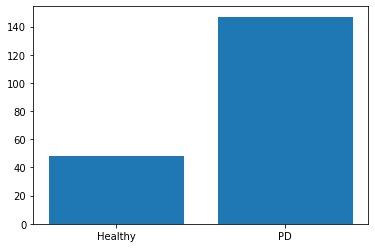

In [7]:
plt.bar(["Healthy","PD"],[count[0],count[1]])

- We have an imbalanced dataset in the ratio **(75:25)**

# Name :

In [8]:
data["name"].value_counts()

phon_R01_S01_1    1
phon_R01_S35_1    1
phon_R01_S31_3    1
phon_R01_S31_4    1
phon_R01_S31_5    1
                 ..
phon_R01_S18_2    1
phon_R01_S18_3    1
phon_R01_S18_4    1
phon_R01_S18_5    1
phon_R01_S50_6    1
Name: name, Length: 195, dtype: int64

- Each row has a unique name and none of the names are repeated. We will drop this feature later.

In [9]:
# to see which features have some repeated values
duplicate = []
for i in list(data.columns):
    unique = len(list(dict(data[i].value_counts()).keys()))
    if unique != 195:
        duplicate.append(i)       

In [10]:
(duplicate)

['MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'status',
 'spread2']

- Above features have some repeated values: 

# EDA : Check distributions

In [11]:
def distributions(feature):
    """
    This function plots pdf for the given feature
    
    """
    plt.figure(figsize=(12, 3))
    plt.subplot(1,2,1)
    sns.kdeplot(data[data['status'] == 1.0][feature][0:] , label = "1", color = 'red',)
    sns.kdeplot(data[data['status'] == 0.0][feature][0:] , label = "0" , color = 'blue')
    plt.legend()

    plt.subplot(1,2,2)
    sns.kdeplot(data = data[feature], shade = True)


In [12]:
data.columns # 17

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [13]:
x1 = list(data.columns)[1:7]
x2 = list(data.columns)[7:12]
x3 = list(data.columns)[12:17]
x4 = list(data.columns)[18:]

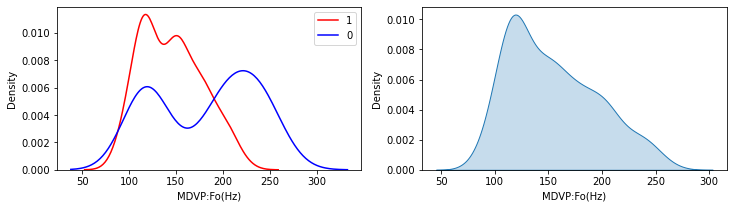

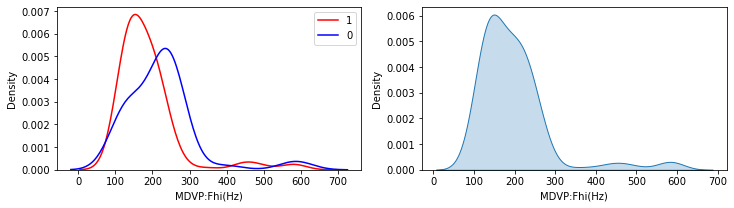

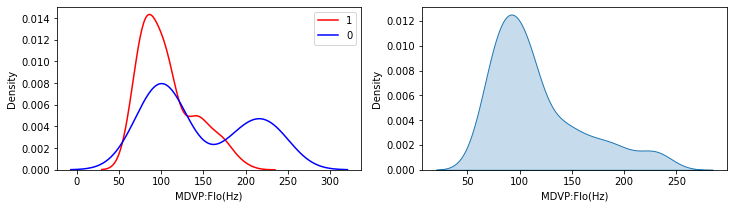

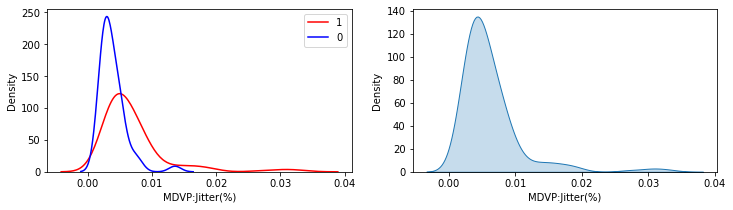

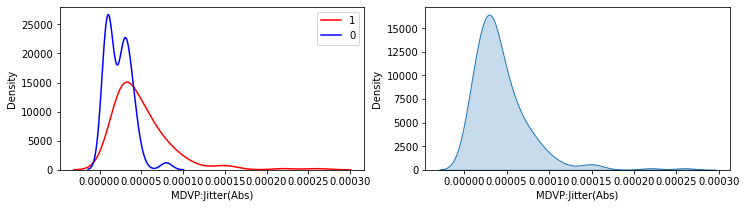

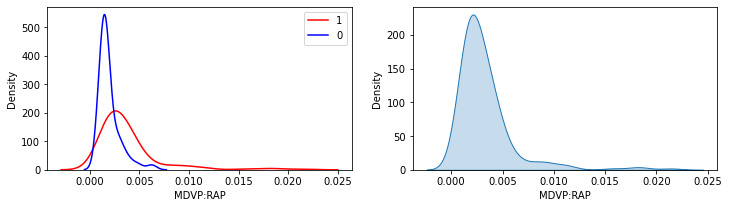

In [14]:
for k in x1:
    distributions(k)

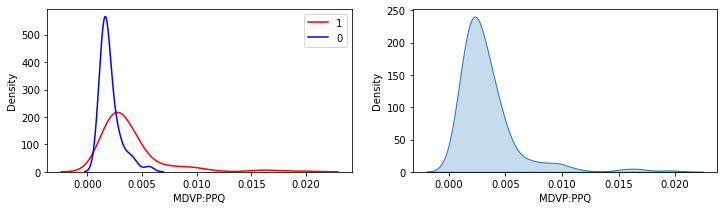

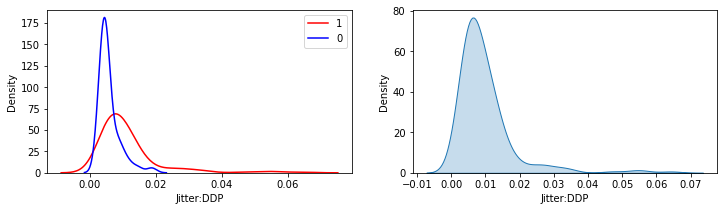

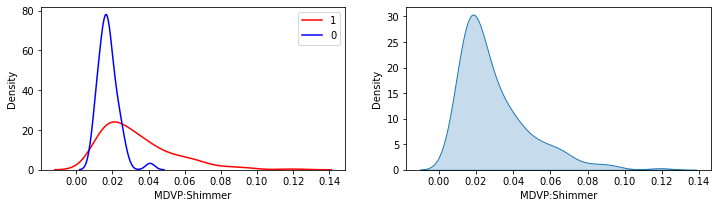

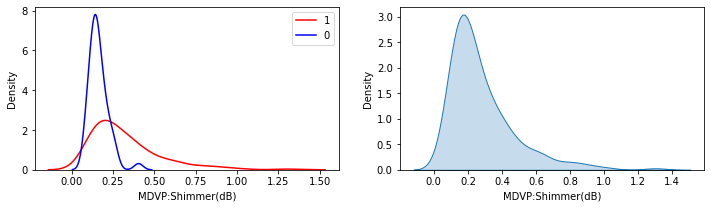

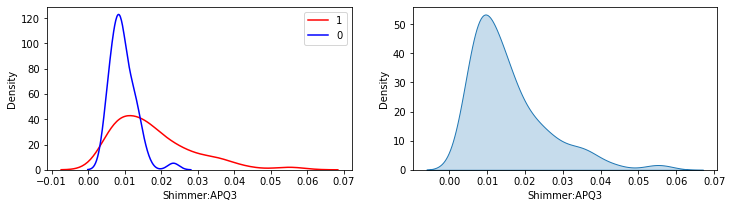

In [15]:
for k in x2:
    distributions(k)

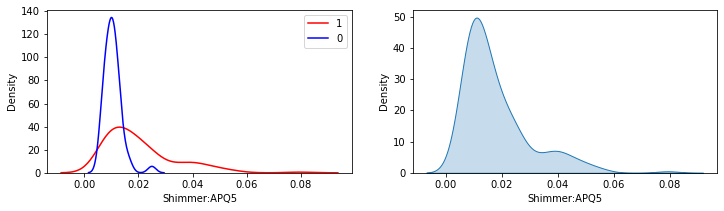

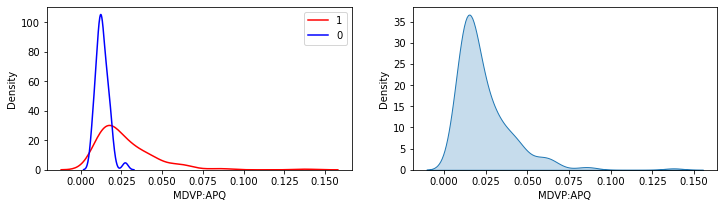

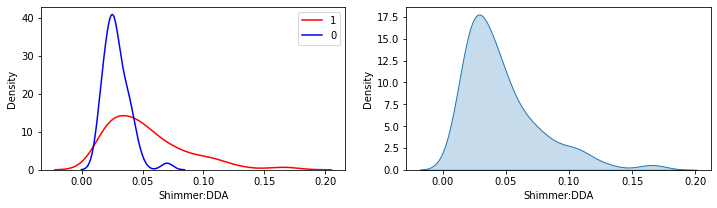

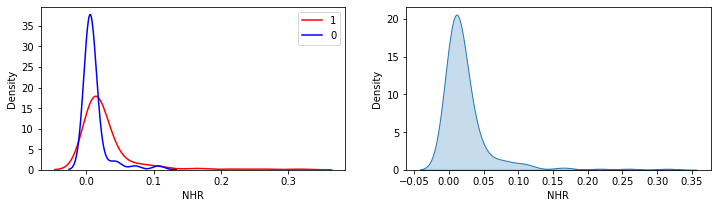

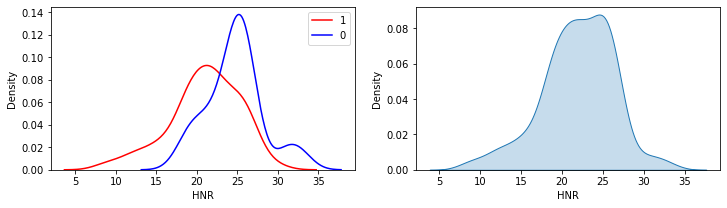

In [16]:
for k in x3:
    distributions(k)

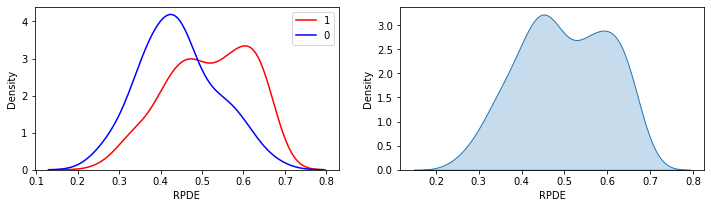

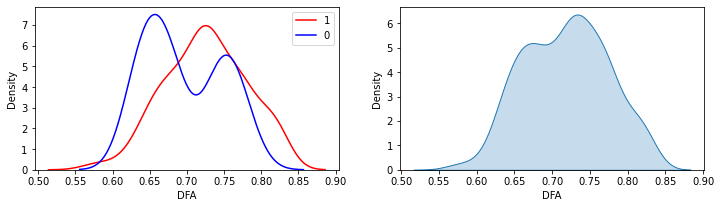

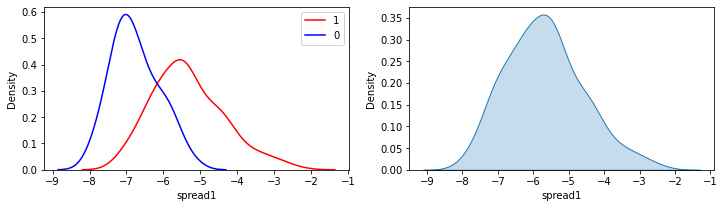

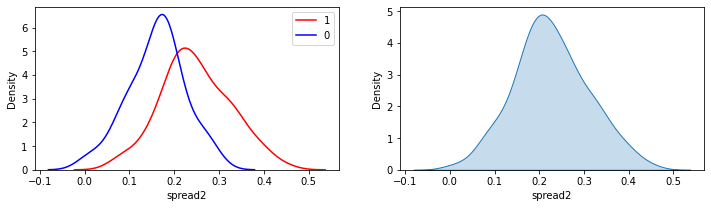

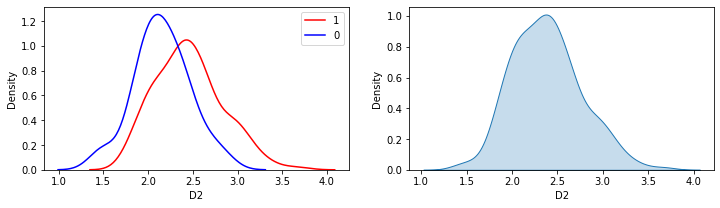

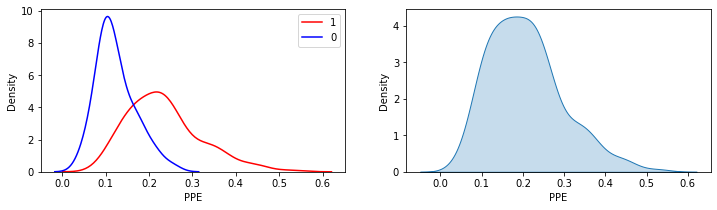

In [17]:
for k in x4:
    distributions(k)

- The above distributions tells us which of the features have normal distribution or log-normal distribution.

In [18]:
# log_normal = ["NHR", "Shimmer:DDA","MDVP:APQ","Shimmer:APQ5","Shimmer:APQ3","MDVP:Shimmer(dB)","MDVP:Shimmer",
               # "Jitter:DDP","MDVP:PPQ", "MDVP:RAP","MDVP:Jitter(Abs)","MDVP:Jitter(%)","MDVP:Flo(Hz)","MDVP:Fhi(Hz)"]
    
# normal = ["D2","spread2","spread1","HNR"]

# Boxplot : (Check outliers)

<AxesSubplot:xlabel='status', ylabel='MDVP:Flo(Hz)'>

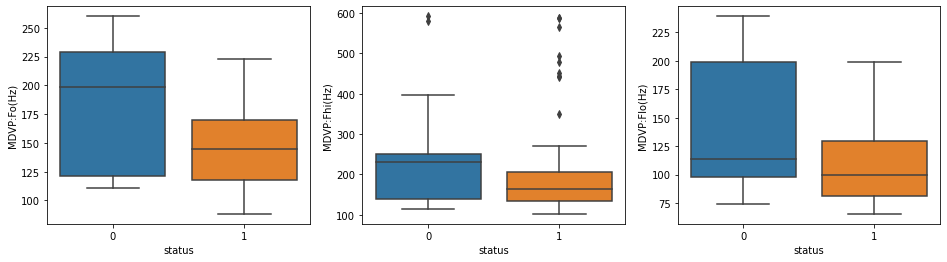

In [19]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.boxplot(x = "status", y = "MDVP:Fo(Hz)",data = data)

plt.subplot(1,3,2)
sns.boxplot(x = "status", y = "MDVP:Fhi(Hz)",data = data)

plt.subplot(1,3,3)
sns.boxplot(x = "status", y = "MDVP:Flo(Hz)",data = data)

<AxesSubplot:xlabel='status', ylabel='MDVP:RAP'>

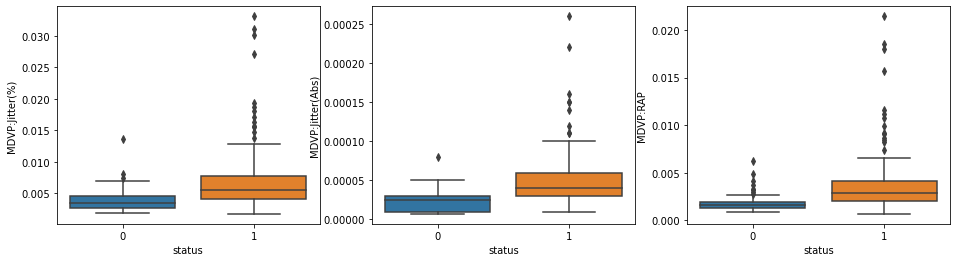

In [20]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.boxplot(x = "status", y = "MDVP:Jitter(%)",data = data)

plt.subplot(1,3,2)
sns.boxplot(x = "status", y = "MDVP:Jitter(Abs)",data = data)

plt.subplot(1,3,3)
sns.boxplot(x = "status", y = "MDVP:RAP",data = data)

<AxesSubplot:xlabel='status', ylabel='MDVP:Shimmer'>

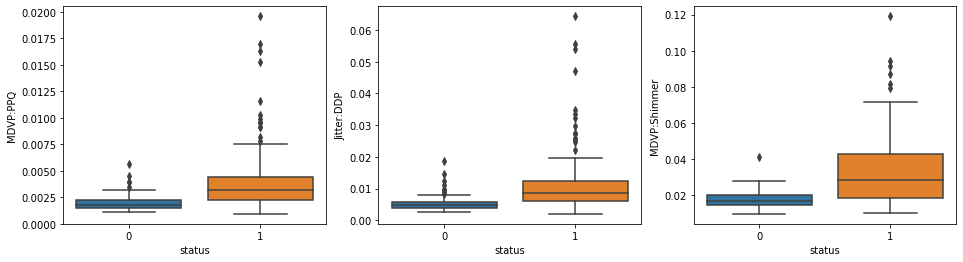

In [21]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.boxplot(x = "status", y = "MDVP:PPQ",data = data)

plt.subplot(1,3,2)
sns.boxplot(x = "status", y = "Jitter:DDP",data = data)

plt.subplot(1,3,3)
sns.boxplot(x = "status", y = "MDVP:Shimmer",data = data)

<AxesSubplot:xlabel='status', ylabel='Shimmer:APQ5'>

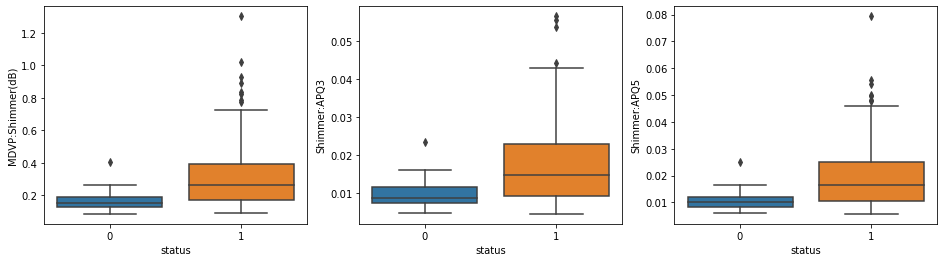

In [22]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.boxplot(x = "status", y = "MDVP:Shimmer(dB)",data = data)

plt.subplot(1,3,2)
sns.boxplot(x = "status", y = "Shimmer:APQ3",data = data)

plt.subplot(1,3,3)
sns.boxplot(x = "status", y = "Shimmer:APQ5",data = data)

<AxesSubplot:xlabel='status', ylabel='NHR'>

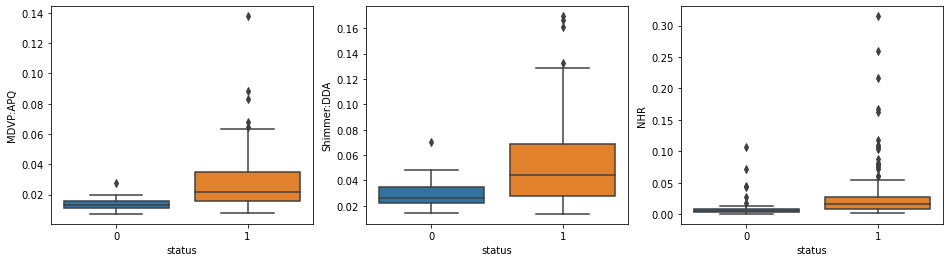

In [23]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.boxplot(x = "status", y = "MDVP:APQ",data = data)

plt.subplot(1,3,2)
sns.boxplot(x = "status", y = "Shimmer:DDA",data = data)

plt.subplot(1,3,3)
sns.boxplot(x = "status", y = "NHR",data = data)

<AxesSubplot:xlabel='status', ylabel='DFA'>

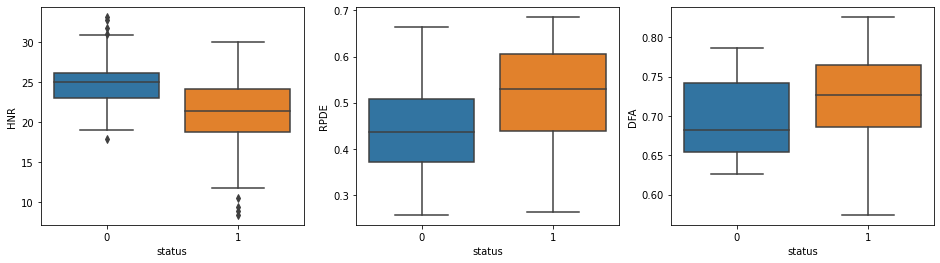

In [24]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.boxplot(x = "status", y = "HNR",data = data)

plt.subplot(1,3,2)
sns.boxplot(x = "status", y = "RPDE",data = data)

plt.subplot(1,3,3)
sns.boxplot(x = "status", y = "DFA",data = data)

<AxesSubplot:xlabel='status', ylabel='D2'>

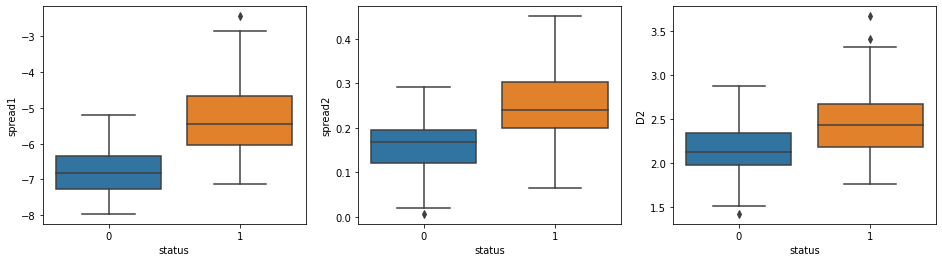

In [25]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.boxplot(x = "status", y = "spread1",data = data)

plt.subplot(1,3,2)
sns.boxplot(x = "status", y = "spread2",data = data)

plt.subplot(1,3,3)
sns.boxplot(x = "status", y = "D2",data = data)

- Above box-plots show the presence of outliers.

# Splitting Data:

In [26]:
x = data.drop(["name","status"],axis = 1)
y = data["status"]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,stratify = y,random_state = 0)

Text(0.5, 1.0, 'Test set distribution')

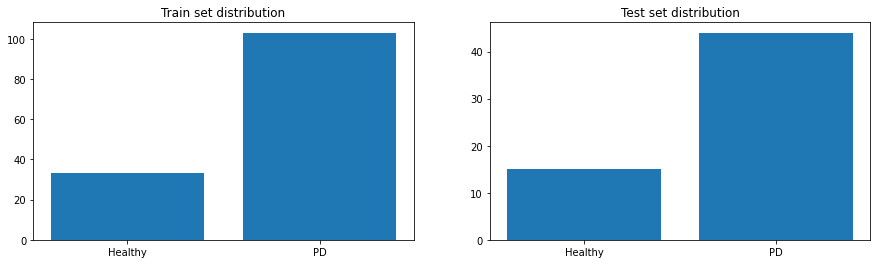

In [28]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
count_train = y_train.value_counts()
plt.bar(["Healthy","PD"],[count_train[0],count_train[1]])
plt.title("Train set distribution")

plt.subplot(1,2,2)
count_test = y_test.value_counts()
plt.bar(["Healthy","PD"],[count_test[0],count_test[1]])
plt.title("Test set distribution")

- Stratify ensures that we get same distribution of target variables in both train & test set.

# Check correlation : (Drop highly correlated features)

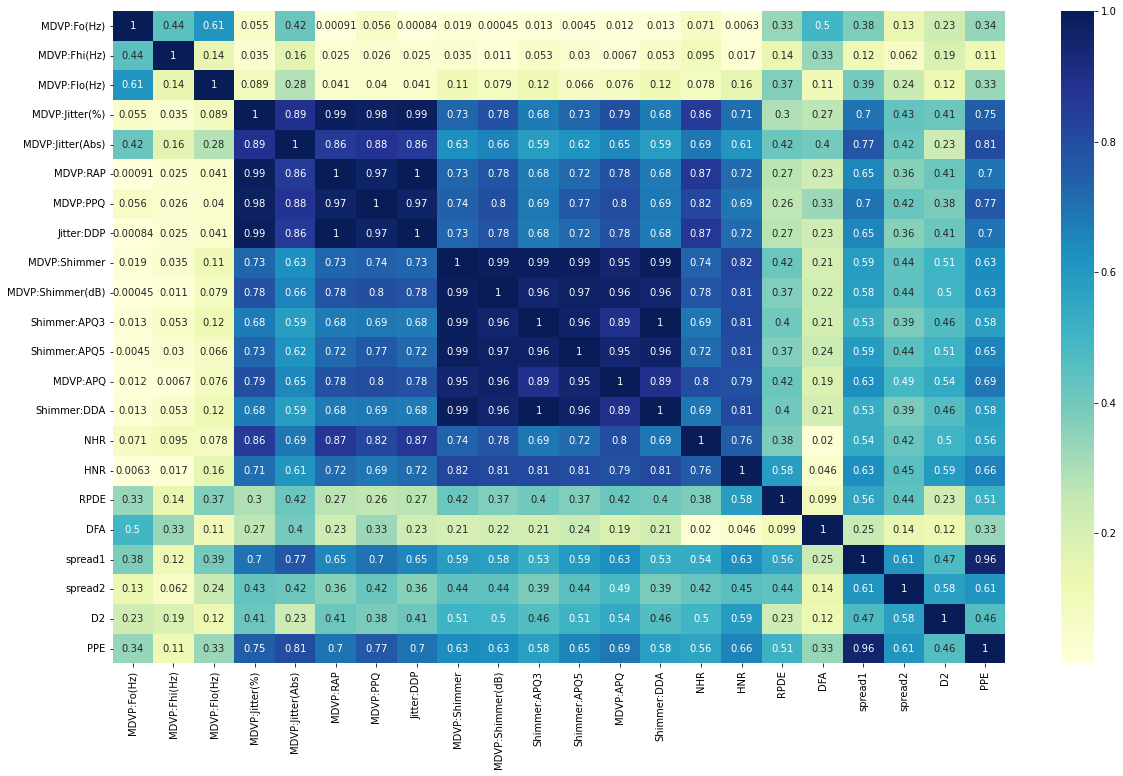

In [29]:
plt.figure(figsize=(20, 12))
sns.heatmap(x_train.corr().abs(), cmap="YlGnBu", annot=True) # getting absolute values for correlation
plt.show()

In [30]:
# the following code returns a upper triangular matrix:

cor_matrix = x_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

C:\Users\PANCHAYAT  SAMITI 01\AppData\Local\Temp\ipykernel_1868\2897038511.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [31]:
# storing the columns to be dropped which are highly correlated (correlation > 0.95)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop) 

['MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'PPE']


In [32]:
# drop the high correlated features from train and test set:

x_train.drop(to_drop,axis =1,inplace = True)
x_test.drop(to_drop,axis =1,inplace = True)

In [33]:
x_train.shape,x_test.shape # 9 features have been dropped

((136, 13), (59, 13))

# Number of Outliers:

In [34]:
def outliers(data,features):
    """
    This function returns the number of outliers for a given feature
    
    """
    arr1 = data[features].values # convert feature values to an array
    q1 = np.quantile(arr1, 0.25) # get 25th percentile
    q3 = np.quantile(arr1, 0.75) # get 75th percentile
    iqr = q3-q1 # Inter Quartile Range

    upper_bound = q3+(1.5*iqr) # upper limit, value beyond this are outliers
    lower_bound = q1-(1.5*iqr) # lower limit, value below this are outliers
    
    outlier = [] # storing all the outliers
    arr = list(arr1)
    for k in arr:
        if k > upper_bound or k < lower_bound: # applying the upper & lower limit condition to get outliers
            outlier.append(k)
    
    return len(outlier)

In [35]:
x1 = list(x_train.columns)
len(x1)

13

In [36]:
# create a dictionary
# {feature : number of outliers}  

dict_outlier_1 ={}
for i in x1:
    dict_outlier_1[i] = outliers(x_train,i)
    
  

In [37]:
dict_outlier_1

{'MDVP:Fo(Hz)': 0,
 'MDVP:Fhi(Hz)': 8,
 'MDVP:Flo(Hz)': 6,
 'MDVP:Jitter(%)': 10,
 'MDVP:Jitter(Abs)': 11,
 'MDVP:Shimmer': 5,
 'NHR': 12,
 'HNR': 1,
 'RPDE': 0,
 'DFA': 0,
 'spread1': 2,
 'spread2': 1,
 'D2': 0}

In [38]:
print("Number of outliers for train set :",sum(list(dict_outlier_1.values())))

Number of outliers for train set : 56


# Converting Log-normal / power law to normal distribution:

In [39]:
log_normal = ["NHR", "Shimmer:DDA","MDVP:APQ","Shimmer:APQ5","Shimmer:APQ3","MDVP:Shimmer(dB)","MDVP:Shimmer",
            "Jitter:DDP","MDVP:PPQ", "MDVP:RAP","MDVP:Jitter(Abs)","MDVP:Jitter(%)","MDVP:Flo(Hz)","MDVP:Fhi(Hz)"]

# the above list consists of features having log-normal distribution.

In [40]:
# getting the features having outliers and who have log-normal distribution
log_normal_features = list(set(log_normal) & set((dict_outlier_1.keys())))

In [41]:
log_normal_features

['MDVP:Shimmer',
 'MDVP:Jitter(Abs)',
 'MDVP:Flo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Jitter(%)',
 'NHR']

<AxesSubplot:ylabel='Density'>

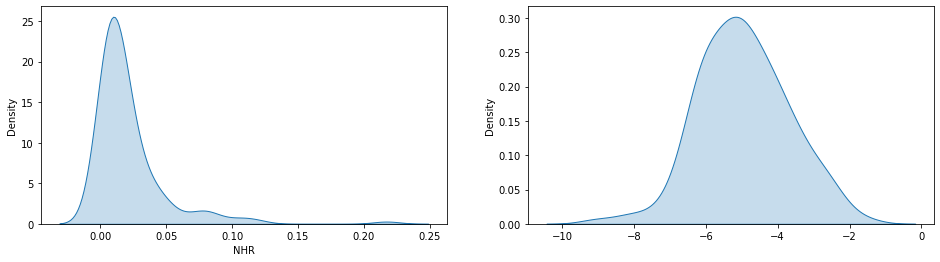

In [42]:
# an example of how box-cox transformationj works.

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.kdeplot(data = x_train["NHR"],shade = True)

transformed_data, lambda_value = stats.boxcox(x_train["NHR"])
plt.subplot(1,2,2)
sns.kdeplot(transformed_data,shade = True)

In [43]:
def log_to_normal(data,features):
    """
    This function returns features with normal distribution
    
    """
    convert,lambda_ =  stats.boxcox(data[features])
    return convert,lambda_

In [44]:
# Box-cox transform on train set :

lambda_values = []
for res in log_normal_features:
    x_train[res],lam_val = log_to_normal(x_train,res)
    lambda_values.append(lam_val)

In [45]:
idx = [a for a in range(len(lambda_values))]
idx

[0, 1, 2, 3, 4, 5]

In [46]:
# Box-cox transform on test set :

for res,idx in zip(log_normal_features,idx):
    transform_test = stats.boxcox(x_test[res],lambda_values[idx])
    x_test[res]= transform_test

# Checking outliers after applying box-cox transformation:

In [47]:
x2 = list(x_train.columns)
len(x2)

13

In [48]:
# checking number of outliers present

dict_outlier_1_normal ={}
for i in x2:
    dict_outlier_1_normal[i] = outliers(x_train,i)

In [49]:
dict_outlier_1_normal

{'MDVP:Fo(Hz)': 0,
 'MDVP:Fhi(Hz)': 0,
 'MDVP:Flo(Hz)': 0,
 'MDVP:Jitter(%)': 1,
 'MDVP:Jitter(Abs)': 17,
 'MDVP:Shimmer': 0,
 'NHR': 1,
 'HNR': 1,
 'RPDE': 0,
 'DFA': 0,
 'spread1': 2,
 'spread2': 1,
 'D2': 0}

In [50]:
print("Number of outliers for train set :",sum(list(dict_outlier_1_normal.values())))

Number of outliers for train set : 23


- The number of outliers have reduced from **56** to **23** after applying **box-cox transformation.**

In [51]:
def replace_outlier(data,features):
    """
    This function a list of quantiles, which will be used to replace the outliers with the median value
    
    """
    arr1 = data[features].values
    q1 = np.quantile(arr1, 0.25)
    q3 = np.quantile(arr1, 0.75)
    q2 = np.quantile(arr1, 0.50)
    
    iqr = q3-q1

    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    limits = [upper_bound,lower_bound,q2]
    
    return (limits)

In [52]:
dict_replace = {}

# list contains all features which still have outliers after box-cox transformation
existing_outlier = [x for x in list(dict_outlier_1_normal.keys()) if dict_outlier_1_normal[x] != 0] 
for u in existing_outlier:
    dict_replace[u] = replace_outlier(x_train,u)
    
# {feature : [upper limit, lower limit, value to replace]}

In [53]:
dict_replace

{'MDVP:Jitter(%)': [-6.3554028349254255,
  -20.20378903628013,
  -13.276576810304995],
 'MDVP:Jitter(Abs)': [-4.744139475526779,
  -5.128778031313676,
  -4.98453857289359],
 'NHR': [-1.4419466522758584, -8.493087269844276, -5.033302278758345],
 'HNR': [33.547000000000004, 10.820999999999993, 22.0],
 'spread1': [-3.0506102499999996, -8.30147825, -5.659058],
 'spread2': [0.44958012499999994, 0.02188312500000003, 0.221719]}

# Replacing the outliers by median:

In [54]:
# Features having values either greater than upper limit or smaller than lower limit are replaced by the median

for j in list(dict_replace.keys()):
    x_train.loc[(x_train[j] > dict_replace[j][0]) | (x_train[j] < dict_replace[j][1]), j] = dict_replace[j][2]


In [55]:
# Now, checking the outliers present after the imputation

dict_outlier_final ={}
for i in list(dict_replace.keys()):
    dict_outlier_final[i] = outliers(x_train,i)

In [56]:
dict_outlier_final

{'MDVP:Jitter(%)': 0,
 'MDVP:Jitter(Abs)': 0,
 'NHR': 0,
 'HNR': 0,
 'spread1': 1,
 'spread2': 0}

In [57]:
print("Number of outliers after imputation :",sum(list(dict_outlier_final.values())))

Number of outliers after imputation : 1


- We successfully worked around the outliers in train set and now there's only 1 left.


# Normalization :

In [58]:
# applying standardization on all features :

scaled = MinMaxScaler()
x_train = scaled.fit_transform(x_train)
x_test = scaled.transform(x_test)

# Oversampling :

In [59]:
# performing oversampling to get balanced dataset for modeling

os=RandomOverSampler(sampling_strategy=0.90 )
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({1: 103, 0: 33})
The number of classes after fit Counter({1: 103, 0: 92})


Text(0.5, 1.0, 'Distribution after oversampling')

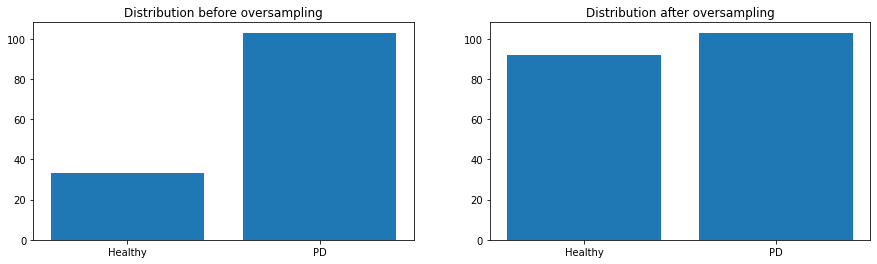

In [60]:
# Now, the distribution of target variables is well balanced.

plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
count_train = y_train.value_counts()
plt.bar(["Healthy","PD"],[count_train[0],count_train[1]])
plt.title("Distribution before oversampling")

plt.subplot(1,2,2)
count_os = y_train_os.value_counts()
plt.bar(["Healthy","PD"],[count_os[0],count_os[1]])
plt.title("Distribution after oversampling")

In [61]:
# saving the data :

import pickle
with open('X_train', 'wb') as fp:
    pickle.dump(x_train_os, fp)
    
with open('X_test', 'wb') as fp:
    pickle.dump(x_test, fp)
    
with open('Y_train', 'wb') as fp:
    pickle.dump(y_train_os, fp)
    
with open('Y_test', 'wb') as fp:
    pickle.dump(y_test, fp)

In [62]:
x_train = x_train_os  
y_train = y_train_os

In [63]:
print("X train shape :",x_train.shape)
print("y train shape :",y_train.shape)
print("X test shape :",x_test.shape)
print("y test shape :",y_test.shape)

X train shape : (195, 13)
y train shape : (195,)
X test shape : (59, 13)
y test shape : (59,)


# Metric : (Get FNR < 0.1)

In [64]:
def cm(original_class,prob_values,threshold): # TN,TP,FN,FP
    """"
    This Function generates True Negative,True Positive
    False Negative,False Positive values.
    
    Based on threshold given it converts the probability values to either 1 or 0.
    
    """
    
    new = []
    for i in prob_values:
        if i>=threshold: # applying the condition to convert probability value to 1
            new.append(1)
        else:           # applying the condition to convert probability value to 0
            new.append(0)
        
    new = np.array(new)

    TN,TP,FN,FP = 0,0,0,0   # initializing all to zero

    for a,b in zip(original_class,new):
        if a == 0 and b == 0:
            TN += 1
        
        elif a == 1 and b == 1:
            TP += 1
        
        elif a == 1 and b == 0:
            FN += 1
    
        else:
            FP += 1

    return (TN,TP,FN,FP)

def TPR_FPR(TN,TP,FN,FP):
    """
    This Function returns True positive rate and
    False positive rate
    
    """
    #tpr = TP/(FN+TP)  # True positive rate
    fnr = FN/(FN+TP)  # False negative rate
    
    return fnr

# Modeling :

# Random forest: (Hyperparameter tuning with RandomizedSearchCV)

In [65]:
# Defining various parameters to get the best one :

n_estimators = [5,20,50,75,100,200,400]
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [3,5,8,12,20,30,50] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [66]:
# Using RandomizedSearchCV to get best hyperparameters.

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, scoring = 'f1',
                                  n_iter = 75, verbose=2, random_state=0, n_jobs = -1)
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=75,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 8, 12, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 75, 100,
                                                         200, 400]},
                   random_state=0, scoring='f1', verbose=2)

In [67]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': True}

In [68]:
# Fitting the model on best hyperparameters

rf_best = RandomForestClassifier(n_estimators = 50,min_samples_split = 2,min_samples_leaf = 1,
                                 max_features = 'sqrt',max_depth = 5,bootstrap =  False)
rf_best.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=5, n_estimators=50)

In [69]:
# getting predictions for both train & test set

rf_predict_test = rf_best.predict(x_test)
rf_predict_train = rf_best.predict(x_train)

In [70]:
# Model performance on train set
# below, we return the confusion matrix, accuracy score and a report based on different metrics 

print(confusion_matrix(y_train,rf_predict_train))
print(accuracy_score(y_train,rf_predict_train))
print(classification_report(y_train,rf_predict_train))

[[ 92   0]
 [  0 103]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       103

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



In [71]:
# Model performance on train set

print(confusion_matrix(y_test,rf_predict_test))
print(accuracy_score(y_test,rf_predict_test))
print(classification_report(y_test,rf_predict_test))

[[ 9  6]
 [ 1 43]]
0.8813559322033898
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



In [72]:
print("F2 score on train :",fbeta_score(y_train,rf_predict_train, beta = 2))
print("F2 score on test :",fbeta_score(y_test,rf_predict_test, beta = 2))

F2 score on train : 1.0
F2 score on test : 0.9555555555555556


- F2 score focuses more on recall as here we have to decrease FNR.
- We check the score on both train and test set to ensure there is no overfitting.

# Best threshold :

In [73]:
# To get good probability values, we apply calibration on top of the model
# These probability values help us in getting True positive rate, False positive rate and various threshold values

sig_clf = CalibratedClassifierCV(rf_best, method="sigmoid")
sig_clf.fit(x_train, y_train)

rf_test_prob = sig_clf.predict_proba(x_test)

In [74]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, rf_test_prob[:,1]) # we get probability values only for status = 1

In [75]:
# youden_j_statistic helps to get optimum threshold.
# The optimum threshold is the one which maximizes the below statistic. (True positive rate - False positive rate)

youden_j_statistic = test_tpr - test_fpr
youden_j_statistic

array([0.        , 0.02272727, 0.63636364, 0.56969697, 0.59242424,
       0.52575758, 0.57121212, 0.50454545, 0.66363636, 0.5969697 ,
       0.68787879, 0.62121212, 0.66666667, 0.        ])

In [76]:
index_max_jvalue = np.argmax(youden_j_statistic) # getting the index for maximum value of the above statistic

In [77]:
best_threshold = te_thresholds[index_max_jvalue] # getting the best threshold through the above index

# False negative rate :

In [78]:
original_class = y_test # true labels
prob_values = rf_test_prob[:,1] # predicted probability for class 1 
threshold = round(best_threshold,3) # best threshold to predict status as 0 or 1.
 
TN,TP,FN,FP = cm(original_class,prob_values,threshold) # We get True positive and negative, False positive and negative.
final_fnr = TPR_FPR(TN,TP,FN,FP) # This returns the False negative rate

In [79]:
print("False negative rate :",final_fnr)
print("Best threshold :",threshold)

False negative rate : 0.06818181818181818
Best threshold : 0.583


[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

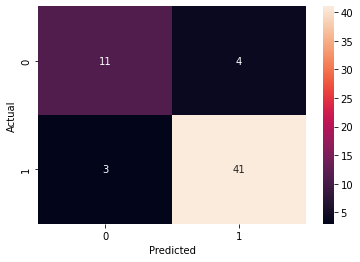

In [80]:
# The below confusion matrix is obtained after considering the best threshold

confusion_matrix = [[TN,FP],[FN,TP]]
cm_heat = sns.heatmap(confusion_matrix, annot = True, fmt="d",xticklabels= [0,1] , yticklabels= [0,1])
cm_heat.set(xlabel='Predicted', ylabel='Actual')

- False Negative Rate = **0.068**

# LGBM :

In [81]:
lgbm = ltb.LGBMClassifier()
lgbm.fit(x_train,y_train)

LGBMClassifier()

In [82]:
lgbm_predict_test = lgbm.predict(x_test)
lgbm_predict_train = lgbm.predict(x_train)

In [84]:
print("F2 score on train :",fbeta_score(y_train,lgbm_predict_train, beta = 2))
print("F2 score on test :",fbeta_score(y_test,lgbm_predict_test, beta = 2))

F2 score on train : 1.0
F2 score on test : 0.9684684684684685


# Best threshold :

In [85]:
sig_clf = CalibratedClassifierCV(lgbm, method="sigmoid")
sig_clf.fit(x_train, y_train)

lgbm_test_prob = sig_clf.predict_proba(x_test)

In [86]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, lgbm_test_prob[:,1])

In [87]:
youden_j_statistic = test_tpr - test_fpr
index_max_jvalue = np.argmax(youden_j_statistic)
best_threshold = te_thresholds[index_max_jvalue]

original_class = y_test
prob_values = lgbm_test_prob[:,1]
threshold = round(best_threshold,3)

TN,TP,FN,FP = cm(original_class,prob_values,threshold)
final_fnr = TPR_FPR(TN,TP,FN,FP)

In [88]:
print("False negative rate :",final_fnr)
print("Best threshold :",threshold)

False negative rate : 0.06818181818181818
Best threshold : 0.716


- False negative rate = **0.068**

[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

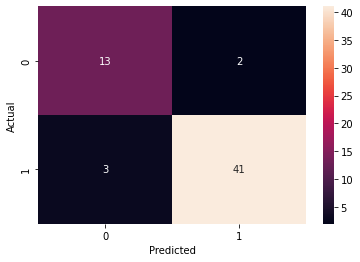

In [89]:
# The below confusion matrix is obtained after considering the best threshold

confusion_matrix = [[TN,FP],[FN,TP]]
cm_heat = sns.heatmap(confusion_matrix, annot = True, fmt="d",xticklabels= [0,1] , yticklabels= [0,1])
cm_heat.set(xlabel='Predicted', ylabel='Actual')

# Result : LGBM gave False Negative Rate of **0.045**